In [47]:
checkpoint_path = 'checkpoints/force-diff-0.2/best-val-acc-0.993-epoch-521.pt'
! python eval_programs.py {checkpoint_path}

Trial 0
Step 17
Trial 1
Step 19
Trial 2
- [1, 8, 10, 9, 9, 10, 8, 0, 10, 5, 0, 10, 6, 7, 10, 4, 0, 10, 8, 1, 10, 9, 9, 10, 7, 4, 10, 1, 9]
?  ---

+ [8, 7, 10, 9, 9, 10, 8, 0, 10, 5, 0, 10, 6, 7, 10, 4, 0, 10, 8, 1, 10, 9, 9, 10, 7, 4, 10, 1, 9]
?    +++

Failed at step 48
Step 127
Trial 3
Step 43
Trial 4
- [1, 4, 10, 6, 2, 10, 9, 9, 10, 4, 5, 10, 0, 0, 10, 8, 3, 10, 0, 0, 10, 9, 1, 10, 9, 9, 10, 6, 9]
?  ^  ^

+ [8, 3, 10, 6, 2, 10, 9, 9, 10, 4, 5, 10, 0, 0, 10, 8, 3, 10, 0, 0, 10, 9, 1, 10, 9, 9, 10, 6, 9]
?  ^  ^

Failed at step 27
Step 30
Trial 5
- [1, 2, 10, 7, 9, 10, 0, 8, 10, 9, 7, 10, 0, 0, 10, 1, 0, 10, 2, 7, 10, 8, 9, 10, 0, 6, 10, 4, 9]
?    ---

+ [8, 1, 10, 7, 9, 10, 0, 8, 10, 9, 7, 10, 0, 0, 10, 1, 0, 10, 2, 7, 10, 8, 9, 10, 0, 6, 10, 4, 9]
?  +++

Failed at step 22
Step 61
Trial 6
- [7, 3, 10, 3, 4, 10, 7, 0, 10, 0, 0, 10, 9, 1, 10, 3, 5, 10, 2, 8, 10, 2, 7, 10, 8, 4, 10, 2, 1]
?  ^  ^

+ [2, 8, 10, 3, 4, 10, 7, 0, 10, 0, 0, 10, 9, 1, 10, 3, 5, 10, 2, 8, 10, 2, 7, 10, 8,

Step 1829
Trial 7
Step 29
Trial 8
Step 51
Trial 9
- [8, 2, 10, 9, 9, 10, 9, 9, 10, 7, 1, 10, 3, 6, 10, 4, 5, 10, 1, 7, 10, 2, 9, 10, 9, 5, 10, 6, 0]
?  ---

+ [2, 9, 10, 9, 9, 10, 9, 9, 10, 7, 1, 10, 3, 6, 10, 4, 5, 10, 1, 7, 10, 2, 9, 10, 9, 5, 10, 6, 0]
?    +++

Failed at step 96
Step 168
Trial 10
- [9, 8, 10, 8, 8, 10, 1, 0, 10, 2, 7, 10, 9, 8, 10, 4, 2, 10, 4, 1, 10, 7, 7, 10, 7, 7, 10, 4, 9]
?  ^  ^

+ [5, 7, 10, 8, 8, 10, 1, 0, 10, 2, 7, 10, 9, 8, 10, 4, 2, 10, 4, 1, 10, 7, 7, 10, 7, 7, 10, 4, 9]
?  ^  ^

Failed at step 3
Step 193
Trial 11
Step 73
Trial 12
Step 146
Trial 13
Step 14
Trial 14
Step 15
Trial 15
- [1, 0, 10, 2, 9, 10, 2, 8, 10, 2, 9, 10, 4, 9, 10, 7, 9, 10, 1, 9, 10, 3, 8, 10, 3, 4, 10, 5, 2]
?  ^  ^

+ [8, 9, 10, 2, 9, 10, 2, 8, 10, 2, 9, 10, 4, 9, 10, 7, 9, 10, 1, 9, 10, 3, 8, 10, 3, 4, 10, 5, 2]
?  ^  ^

Failed at step 7
Step 96
Trial 16
- [8, 2, 10, 5, 9, 10, 2, 0, 10, 1, 3, 10, 0, 6, 10, 2, 5, 10, 8, 9, 10, 1, 0, 10, 5, 2, 10, 2, 6]
?  ^  ^

+ [1, 3, 10, 5, 9, 1

In [48]:
import torch

import simulator

checkpoint = torch.load(checkpoint_path)
args = checkpoint['args']

sim = simulator.SubleqSimV3(mem_bits=args.N, num_mem=args.num_mem, ary=args.ary)

fail_state = torch.load('fail_state/' + checkpoint_path.split('/')[1] + '_fail-state.pt')

In [49]:
fail_info = []
for i, fail in enumerate(fail_state):
    if fail is not None:
        print('Trial', i)
        current_state, next_state_hyp, next_state = fail
        current_state_info = sim.readable_state(current_state)
        current_state = current_state_info['mem']
        next_state_hyp = sim.readable_state(next_state_hyp)['mem']
        next_state = sim.readable_state(next_state)['mem']

        print(current_state_info)
        fail_info.append(current_state_info)

        for j, seq in enumerate([current_state, next_state_hyp, next_state]):
            if j == 0:
                print('Input     :', end='')
            elif j == 1:
                print('Prediction:', end='')
            else:
                print('Target    :', end='')
            for pos in range(len(current_state)):
                if next_state_hyp[pos] != next_state[pos]:
                    # indicate error with a red background
                    print('\x1b[6;30;41m' + '{0: >6}'.format(seq[pos]) + '\x1b[0m', end='')
                else:
                    print('{0: >6}'.format(seq[pos]), end='')
            print()


Trial 2
{'pc': 8, 'eval': 'mem[91](98) <-- mem[91](98) - mem[47](99) = -1', 'jump': 'pc <-- 78', 'diff': -1, 'mem': [78, 98, 8, 5, 76, 4, 18, 99, 47, 91]}
Input     :    78    98     8     5    76     4    18    99    47    91
Prediction:    81    99     8     5    76     4    18    99    47    91
Target    :    78    99     8     5    76     4    18    99    47    91
Trial 4
{'pc': 8, 'eval': 'mem[96](96) <-- mem[96](96) - mem[99](96) = 0', 'jump': 'pc <-- 38', 'diff': 0, 'mem': [38, 26, 99, 54, 0, 38, 96, 19, 99, 96]}
Input     :    38    26    99    54     0    38    96    19    99    96
Prediction:    41    26    99    54     0    38     0    19    99    96
Target    :    38    26    99    54     0    38     0    19    99    96
Trial 5
{'pc': 8, 'eval': 'mem[94](18) <-- mem[94](18) - mem[60](18) = 0', 'jump': 'pc <-- 18', 'diff': 0, 'mem': [18, 97, 80, 79, 18, 1, 72, 98, 60, 94]}
Input     :    18    97    80    79    18     1    72    98    60    94
Prediction:    21    97    80  

In [50]:
# test_state = fail_state[8][0]

# sim.set_state(test_state)
# print(sim.step(verbose=True))

import numpy as np

print(np.count_nonzero(['pc <-- pc + 3' in f['jump'] for f in fail_info]))
print(np.count_nonzero(['pc <-- pc + 3' not in f['jump'] for f in fail_info]))

11
30


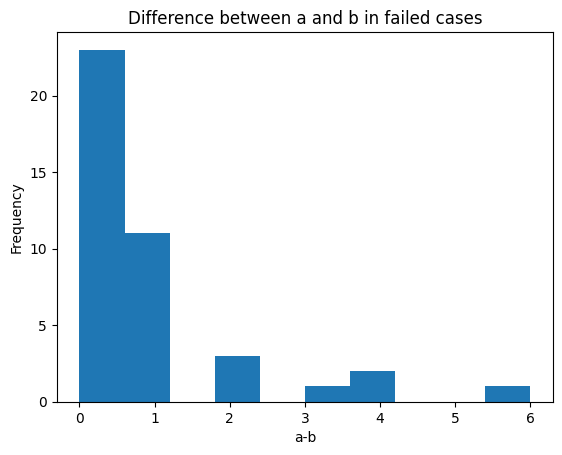

In [51]:
import matplotlib.pyplot as plt

# plt.bar(range(len(fail_info)), sorted([f['diff'] for f in fail_info]))
plt.hist([abs(f['diff']) for f in fail_info])

plt.xlabel('a-b')
plt.ylabel('Frequency')
plt.title('Difference between a and b in failed cases')
plt.show()